In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower

import nbimporter
from helper import *

In [2]:
#import csv data 
races = pd.read_csv('src/races.csv')
runs = pd.read_csv('src/runs.csv')

In [3]:
# fill in 0's for NaN values in times for non-existent portions of race
runs['time4'].fillna(0, inplace=True)
runs['time5'].fillna(0, inplace=True)
runs['time6'].fillna(0, inplace=True)

#check to see if fill in worked
runs.isnull().sum(axis = 0)

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
horse_gear             0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
time6                  0
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
dtype: int64

In [4]:
#narrow down focus of columns/ features from run data desired to analyze

runs_data = runs[['race_id', 'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'win_odds',
       'place_odds','time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'horse_id']]
# runs_data.head()

In [5]:
#narrow down focus of columns/ features from races data desired to analyze
races_data = races[['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class']]
# races_data.head()

In [6]:
# merge the two datasets based on race_id column
df = pd.merge(runs_data, races_data)
df.describe()

,race_id,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,time1,...,time3,time4,time5,time6,horse_id,race_no,surface,distance,prize,race_class
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,75712.000000,79447.000000,...,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,7.359800e+04,79447.000000
mean,3173.352814,0.080053,3.339346,61.034904,1104.953568,122.729656,6.876005,28.812977,7.423177,21.135438,...,23.864054,13.987405,3.058096,0.397219,2204.410525,5.280086,0.108865,1419.195816,1.117461e+06,3.873136
std,1833.101494,0.271378,0.876763,11.748788,62.347597,6.305496,3.747589,30.097375,8.823430,6.930518,...,3.571163,12.379825,8.032828,3.089157,1275.049375,2.812404,0.311472,277.221341,1.734767e+06,1.923251
min,0.000000,0.000000,2.000000,10.000000,693.000000,103.000000,1.000000,1.000000,1.000000,12.390000,...,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1000.000000,4.850000e+05,0.000000
25%,1586.000000,0.000000,3.000000,60.000000,1062.000000,118.000000,4.000000,7.700000,2.400000,14.120000,...,23.230000,0.000000,0.000000,0.000000,1085.000000,3.000000,0.000000,1200.000000,6.400000e+05,3.000000
50%,3174.000000,0.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,15.000000,4.100000,24.180000,...,23.760000,23.010000,0.000000,0.000000,2209.000000,5.000000,0.000000,1400.000000,8.000000e+05,4.000000
75%,4764.500000,0.000000,3.000000,60.000000,1146.000000,128.000000,10.000000,38.000000,8.600000,25.360000,...,24.410000,24.050000,0.000000,0.000000,3308.000000,8.000000,0.000000,1650.000000,1.060000e+06,4.000000
max,6348.000000,1.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,99.000000,101.000000,999.000000,...,999.000000,999.000000,49.570000,34.150000,4404.000000,11.000000,1.000000,2400.000000,2.500000e+07,13.000000


In [7]:
#create new column for total_time

df['total_time'] = (df['time1'] + df['time2'] + df['time3'])
# df['total_time'].head(10)

#add avg time per section column
df['avg_time'] = (df['time1'] +df['time2'] +df['time3'])/3
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'total_time', 'avg_time'],
      dtype='object')

In [8]:
# update DataFrame for jockey weight class column calculated
df["weight_class"] = df.apply(lambda row: group_jockweight(row), axis=1)
df[["actual_weight","weight_class"]].head()

,actual_weight,weight_class
0,133,10_class
1,133,10_class
2,132,10_class
3,127,9_class
4,131,10_class


In [9]:
# update DataFrame for horse weight class column calculated
df["horseweight_class"] = df.apply(lambda row: group_horseweight(row), axis=1)

In [10]:
#remove the MAJOR outliers
df = df[(df['total_time'] < 90)]

total_time_df = df[(df['total_time'] < 90)]

In [11]:
# # create dirt and turf DataFrames and remove outliers
# dirt_df = df[df['surface'] == 1]
# turf_df = df[df['surface'] == 0]
# turf_df = df[df['total_time'] < 90]

# # create Pandas Series for Turf and Dirt
# dirt_time_df = dirt_df['total_time']
# turf_time_df = turf_df['total_time']

# #create data array for dirt avg time
# dirt_time = np.array(dirt_time_df)
# #create data array for turf avg time
# turf_time = np.array(turf_time_df)

In [12]:
#create a new dataframe for new sub-population_races of 1200m
total_time_dist1_df = df[(df['distance'] == 1200)]

In [13]:
# pandas drop columns using list of column names for heatmap
total_time_dist1_df_clean = total_time_dist1_df.drop(['time4', 'time5', 'time6', 'surface', 'distance'], axis=1)
total_time_dist1_df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'total_time', 'avg_time', 'weight_class', 'horseweight_class'],
      dtype='object')

In [14]:
#need to take population into subsets based on total distance of race (1200 first distance)
total_time_dist1_df = df[(df['distance'] == 1200)]

In [15]:
# split between venues for hypothesis testing

HV_time_dist1_df = total_time_dist1_df[(total_time_dist1_df['venue'] == 'HV')]
ST_time_dist1_df = total_time_dist1_df[(total_time_dist1_df['venue'] == 'ST')]

In [16]:
#establish the two population time arrays
HV_time_dist = np.array(HV_time_dist1_df ['total_time'])
ST_time_dist = np.array(ST_time_dist1_df ['total_time'])

In [17]:
# Two Sample Approximate Test of Population Means
# Happy valley population

HVpop_std = np.std(HV_time_dist)
HVpop_mu = np.mean(HV_time_dist)
HVpop_var = np.var(HV_time_dist)
print(f"The Happy Valley population std dev: {HVpop_std}, \
population variance: {HVpop_var},and population mean: {HVpop_mu}")
HVpopulation = stats.norm(HVpop_mu, HVpop_std)

The Happy Valley population std dev: 0.7856470275604992, population variance: 0.6172412519146478,and population mean: 71.00644078398665


In [18]:
# Two Sample Approximate Test of Population Means
# Shatin population

STpop_std = np.std(ST_time_dist)
STpop_mu = np.mean(ST_time_dist)
STpop_var = np.var(ST_time_dist)
print(f"The Sha Tin population std dev: {STpop_std}, \
population variance: {STpop_var},and population mean: {STpop_mu}")
STpopulation = stats.norm(STpop_mu, STpop_std)

The Sha Tin population std dev: 1.0674258030375738, population variance: 1.1393978449904094,and population mean: 70.54171356684103


In [19]:
# HVsample = HVpopulation.rvs(1000)
# STsample = STpopulation.rvs(1000)
HVsample = np.random.choice(HV_time_dist, 200)
STsample = np.random.choice(ST_time_dist, 200)
print(type(HVsample))

<class 'numpy.ndarray'>


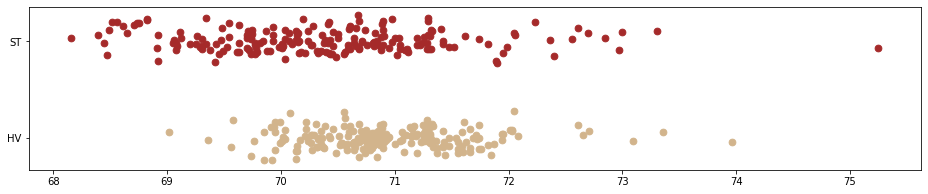

In [20]:
# speeds: HV vs ST
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HVsample, 
           np.repeat(0, len(HVsample)) + \
           np.random.normal(0, 0.1, len(HVsample)), ## jitter
           color = 'tan', s=45)
ax.scatter(STsample, 
           np.repeat(1, len(STsample)) + \
           np.random.normal(0, 0.1, len(STsample)), 
           color = 'brown', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV", "ST"]);

In [21]:
# Welsh's t-test 

# def welch_test_statistic(sample_1, sample_2):
#     numerator = np.mean(sample_1) - np.mean(sample_2)
#     denominator_sq = (np.var(sample_1) / len(sample_1)) + \
#                         (np.var(sample_2) / len(sample_2))
#     return numerator / np.sqrt(denominator_sq)

In [22]:
test_statistic = welch_test_statistic(STsample, HVsample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -6.05


In [23]:
# def welch_satterhwaithe_df(samp_1, samp_2):
#     ss1 = len(samp_1)
#     ss2 = len(samp_2)
#     df = (((np.var(samp_1)/ss1 + np.var(samp_2)/ss2)**(2.0)) / 
#         ((np.var(samp_1)/ss1)**(2.0)/(ss1 - 1)
#          + (np.var(samp_2)/ss2)**(2.0)/(ss2 - 1)))
#     return df

In [24]:
degrees_free = welch_satterhwaithe_df(STsample, HVsample)
print(f'Degrees of Freedom for Welch\'s Test: {degrees_free}')

Degrees of Freedom for Welch's Test: 346.71213427655914


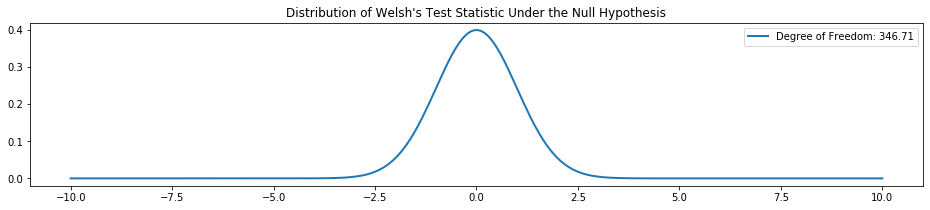

In [25]:
#Welch Stat Distrib
x = np.linspace(-10, 10, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(degrees_free)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(degrees_free))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

In [26]:
# Do we have enough evidence to conclude that one is better?
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average times : {:2.14f}".format(p_value))

p-value for different average times : 0.00000000375422


In [27]:
# Do we have enough evidence to say HV turf track is "less fast"
test_stat_better1 = welch_test_statistic(HVsample, STsample)

p_value = 1 - students.cdf(test_stat_better1)
print("p-value for HV time over distance greater than ST: {:2.14f}".format(p_value))

p-value for HV time over distance greater than ST: 0.00000000187711


In [28]:
# what if i do it again and limit it to track type 0 TURF ONLY
# split between venues for hypothesis testing

HV0_time_dist1_df = HV_time_dist1_df[(HV_time_dist1_df['surface'] == 0)]
ST0_time_dist1_df = ST_time_dist1_df[(ST_time_dist1_df['surface'] == 0)]

In [29]:
#establish the two population time arrays for TURF ONLY
HV0_time_dist = np.array(HV0_time_dist1_df ['total_time'])
ST0_time_dist = np.array(ST0_time_dist1_df ['total_time'])

In [30]:
# Two Sample Approximate Test of Population Means
# Happy valley population TURF ONLY

HV0pop_std = np.std(HV0_time_dist)
HV0pop_mu = np.mean(HV0_time_dist)
HV0pop_var = np.var(HV0_time_dist)
print(HV0pop_std, HV0pop_var, HV0pop_mu)
HV0population = stats.norm(HV0pop_mu, HV0pop_std)

0.7856470275604992 0.6172412519146478 71.00644078398665


In [31]:
# Two Sample Approximate Test of Population Means
# Shatin population TURF ONLY

ST0pop_std = np.std(ST0_time_dist)
ST0pop_mu = np.mean(ST0_time_dist)
ST0pop_var = np.var(ST0_time_dist)
print(ST0pop_std, ST0pop_var, ST0pop_mu)
ST0population = stats.norm(ST0pop_mu, ST0pop_std)

1.0327302612604663 1.0665317925231108 70.6950085861477


In [32]:
#large random sample over TURF ONLY
np.random.seed(5)
HV00sample = np.random.choice(HV0_time_dist, 8000)
ST00sample = np.random.choice(ST0_time_dist, 8000)

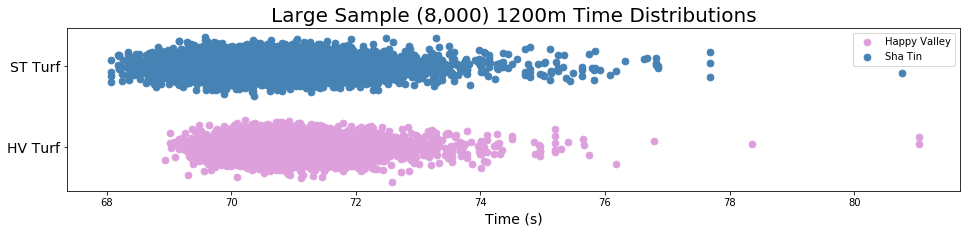

In [33]:
# speeds: HV vs ST TURF ONLY POPULATION
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HV00sample, 
           np.repeat(0, len(HV00sample)) + \
           np.random.normal(0, 0.1, len(HV00sample)), ## jitter
           label = 'Happy Valley', color = 'plum', s=45)
ax.scatter(ST00sample, 
           np.repeat(1, len(ST00sample)) + \
           np.random.normal(0, 0.1, len(ST00sample)), 
           label = "Sha Tin", color = 'steelblue', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV Turf", "ST Turf"], fontsize=14)
ax.set_xlabel("Time (s)", fontsize=14)
ax.legend(loc = 'best')
ax.set_title("Large Sample (8,000) 1200m Time Distributions", fontsize=20)
bbox_inches='tight';
# plt.savefig('LargeSampleScatterHVSTTurf.png')

In [34]:
#small random sample TURF ONLY
np.random.seed(5000)
HV0sample = np.random.choice(HV0_time_dist, 100)
ST0sample = np.random.choice(ST0_time_dist, 100)

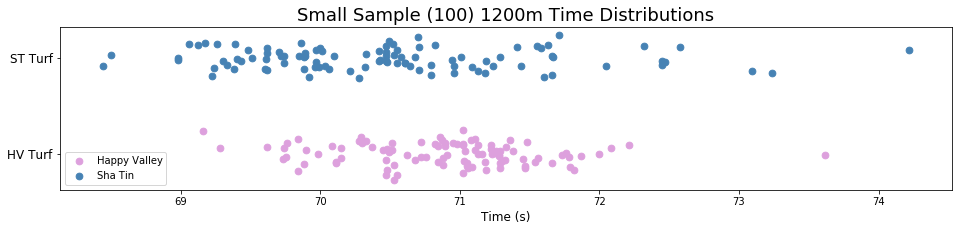

In [35]:
# speeds: smaller sample HV vs ST TURF ONLY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HV0sample, 
           np.repeat(0, len(HV0sample)) + \
           np.random.normal(0, 0.1, len(HV0sample)), ## jitter
           label = 'Happy Valley', color = 'plum', s=45)
ax.scatter(ST0sample, 
           np.repeat(1, len(ST0sample)) + \
           np.random.normal(0, 0.1, len(ST0sample)), 
           label = "Sha Tin", color = 'steelblue', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV Turf", "ST Turf"], fontsize=12)
ax.set_xlabel("Time (s)", fontsize=12)
ax.legend(loc = 'best')
ax.set_title("Small Sample (100) 1200m Time Distributions", fontsize=18);
# plt.savefig('SampleScatterHVSTTurf.png',bbox_inches='tight')

In [36]:
#smaller sample test stat
test_statistic0 = welch_test_statistic(ST0sample, HV0sample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic0))

Welch Test Statistic: -3.20


In [37]:
degrees_free0 = welch_satterhwaithe_df(ST0sample, HV0sample)
print(f'Degrees of Freedom for Welch\'s Test: {degrees_free0}')

Degrees of Freedom for Welch's Test: 170.09974577196962


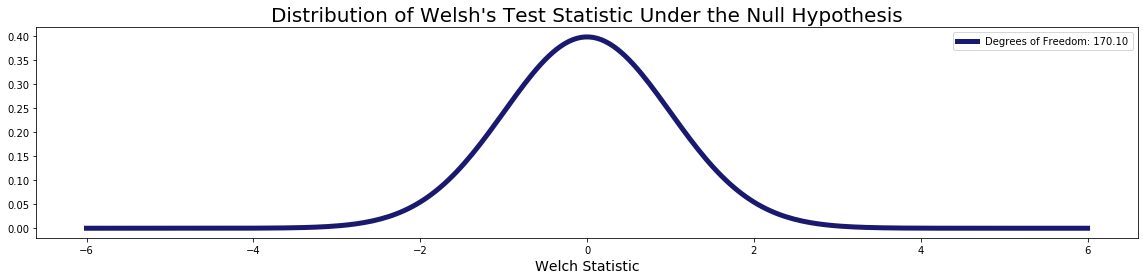

In [38]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-6, 6, num=250)

fig, ax = plt.subplots(1, figsize=(16, 4))
students = stats.t(degrees_free0)
ax.plot(x, students.pdf(x), linewidth=5, color = 'midnightblue', label="Degrees of Freedom: {:2.2f}".format(degrees_free0))
ax.legend()
ax.set_xlabel("Welch Statistic", fontsize=14)
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis", fontsize=20)
plt.tight_layout();
# plt.savefig('WelchStatDistribTurf.png', bbox_inches='tight')

In [39]:
# Smaller sample: Do we have enough evidence to conclude that one is better?
p_value0 = students.cdf(test_statistic0) + (1 - students.cdf(-test_statistic0))
print("p-value for different average times over turf : {:2.14f}".format(p_value0))

p-value for different average times over turf : 0.00164456406652


In [40]:
# Smaller sample: Do we have enough evidence to conclude that HV is less fast track?
test_stat_better0 = welch_test_statistic(HV0sample, ST0sample)

p0_value = 1 - students.cdf(test_stat_better0)
print("p-value for HV time over distance greater than ST over turf: {:2.14f}".format(p0_value))

p-value for HV time over distance greater than ST over turf: 0.00082228203326


In [41]:
#calculate pvalue using stats ttest smaller sample
stats.ttest_ind(ST0sample, HV0sample)

Ttest_indResult(statistic=-3.1830686341634995, pvalue=0.0016924250643034267)

In [42]:
# perform a two tailed ztest to run simulation of p values over time

from statsmodels.stats import weightstats as stests

result, pv = stests.ztest(ST0sample, x2=HV0sample, value=0,alternative='two-sided')
print(result,pv)

-3.1830686341634995 0.0014572306744265488
